In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import optimizers
from keras.applications.resnet50 import ResNet50
from keras import Model, layers

import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import cv2

Using TensorFlow backend.


In [2]:
path = "flowers/"

In [3]:
numberOfClass = len(glob(path + "/*"))

print(numberOfClass)

5


In [4]:
res_net = ResNet50(include_top = True, weights = "imagenet")

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
print(res_net.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [6]:
res_net.layers.pop()

In [7]:
res_net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [8]:
res_net_layer_list = res_net.layers

res_net_layer_list

In [9]:
model = Sequential()

In [10]:
model_input = layers.Input(shape=(224,224,3))

x = res_net(model_input)

x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(5, activation='softmax')(x)

model = Model(model_input, predictions)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [12]:
batch_size = 16

In [13]:
image_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    rotation_range=45,
                                    validation_split=0.3)

In [14]:
train_data_gen = image_data_gen.flow_from_directory(directory=path,
                                                    target_size = (224,224),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode = 'sparse',
                                                    subset='training')

Found 3028 images belonging to 5 classes.


In [15]:
test_data_gen = image_data_gen.flow_from_directory(directory=path,
                                                   target_size = (224,224),
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode = 'sparse',
                                                   subset='validation')

Found 1295 images belonging to 5 classes.


In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

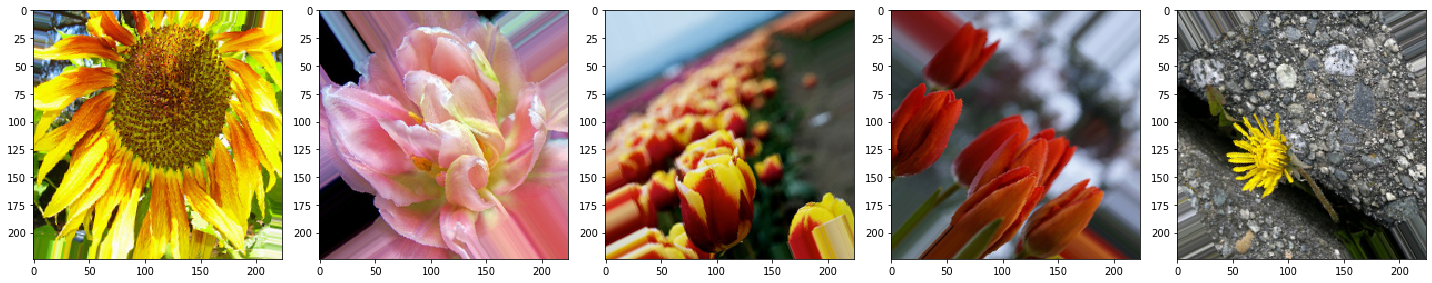

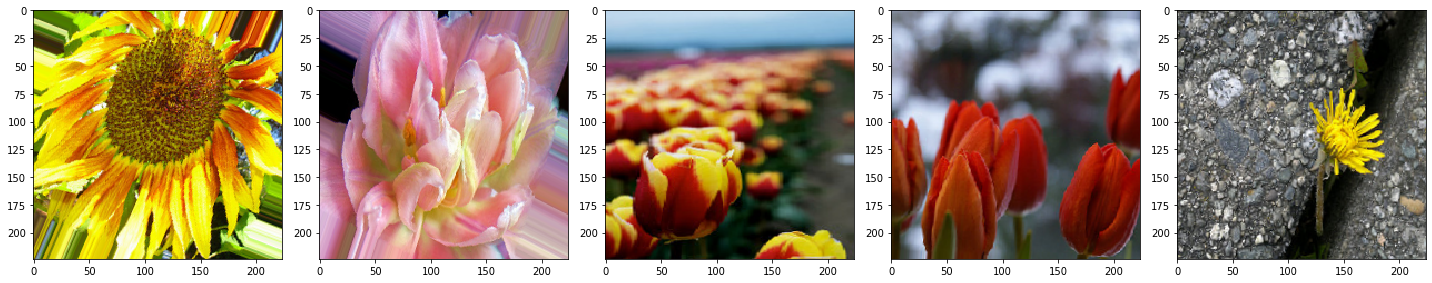

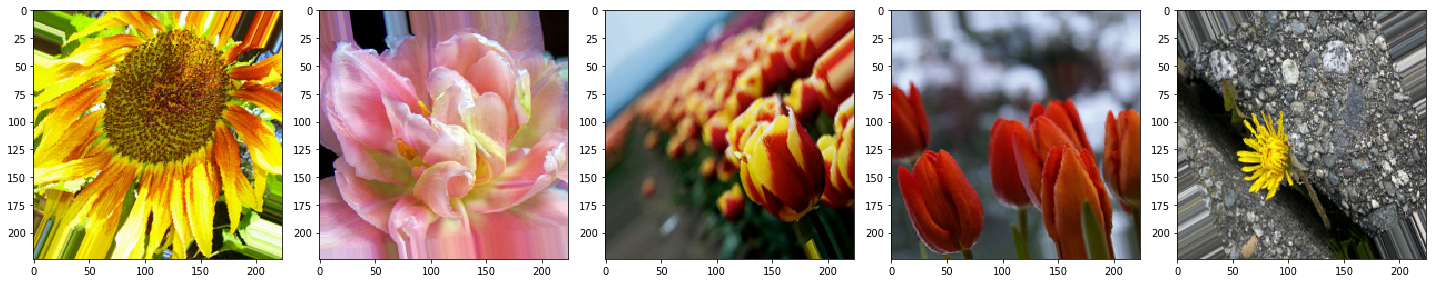

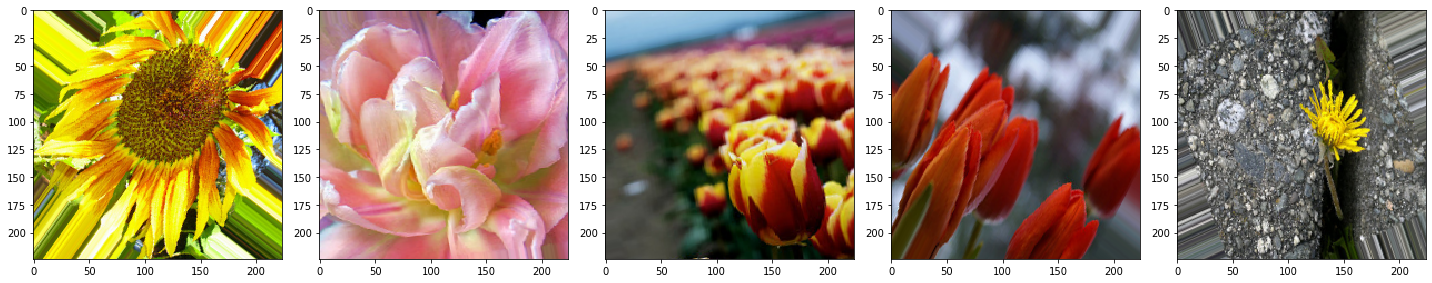

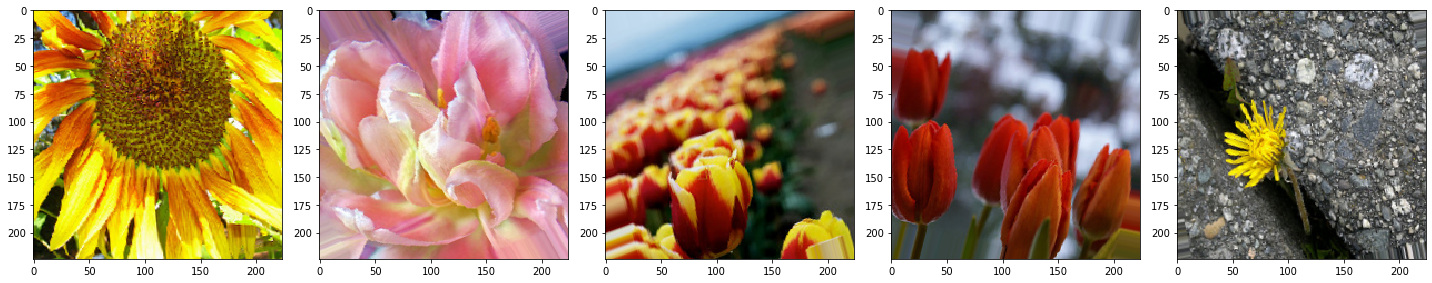

In [17]:
for i in range(5):
    augmented_images = [train_data_gen[i][0][i] for i in range(5)]
    plotImages(augmented_images)

In [18]:
hist = model.fit_generator(train_data_gen,
                           steps_per_epoch=train_data_gen.n//batch_size,
                           epochs= 50,
                           validation_data=test_data_gen,
                           validation_steps= test_data_gen.n//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
189/189 [==============================] - 298s 2s/step - loss: 1.5797 - acc: 0.2728 - val_loss: 1.5921 - val_acc: 0.2469
Epoch 2/50
189/189 [==============================] - 244s 1s/step - loss: 1.4811 - acc: 0.3595 - val_loss: 1.8524 - val_acc: 0.2447
Epoch 3/50
189/189 [==============================] - 124s 658ms/step - loss: 1.4581 - acc: 0.3601 - val_loss: 1.6167 - val_acc: 0.3417
Epoch 4/50
189/189 [==============================] - 124s 656ms/step - loss: 1.3497 - acc: 0.4193 - val_loss: 1.3249 - val_acc: 0.4371
Epoch 5/50
189/189 [==============================] - 129s 681ms/step - loss: 1.3102 - acc: 0.4517 - val_loss: 1.2812 - val_acc: 0.4332
Epoch 6/50
189/189 [==============================] - 129s 682ms/step - loss: 1.2545 - acc: 0.4666 - val_loss: 1.2020 - val_acc: 0.4699
Epoch 7/50
189/189 [==============================] - 132s 700ms/step - loss: 1.1971 - acc: 0.4973 - val_loss: 1.8246 - val_acc: 0.3503
Epoch 

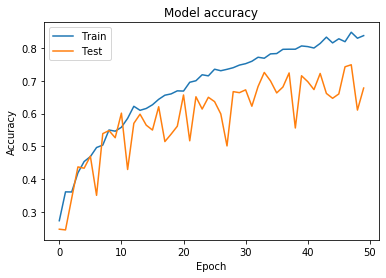

In [19]:
# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

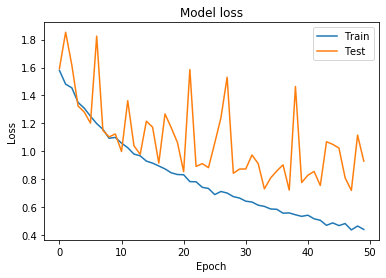

In [20]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()